<h1><center>
    ECE 438 - Laboratory 5a<br/>
    Digital Filter Design (Week 1)<br/>
    <small>Last updated on February 13, 2022</small><br/>
    <br/>
    Date: 2/9<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 Ruixiang Wang| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding and implementation of simple FIR filter (40 pts)**: *Difference eq., flow diagram, impulse response, plots of magnitude response, plots of original and filtered signals and their DTFT, matlab code, questions*||||
|**Understanding and implementation of simple IIR filter (40 pts)**: *Difference eq., flow diagram, impulse response, plots of magnitude response, plots of original and filtered signals and their DTFT, matlab code, questions*||||
|**Understanding parameters of lowpass filter design (20 pts)**: *Magnitude response plots with marked regions, questions*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 3.1</left></h3>

**1. Submit the difference equation for the filter $H_f(z)$.**

<img src="Image_20230209121155.jpg">

**2. Submit the system diagram of the impulse response for the filter $H_f(z)$.**

<img src="FIR.drawio.png">

**3. Submit the analytical expression of the impulse response for the filter $H_f(z)$.**

<img src="Image_20230209130622.jpg">

**4. Write Python code to compute and plot the magnitude of the filter’s frequency response $|H_f(e^{j\omega})|$ as a function of $\omega$ on the interval $−\pi < \omega < \pi$, for the following three values of $\theta$:**

* $\theta=\pi/6$
* $\theta=\pi/3$
* $\theta=\pi/2$

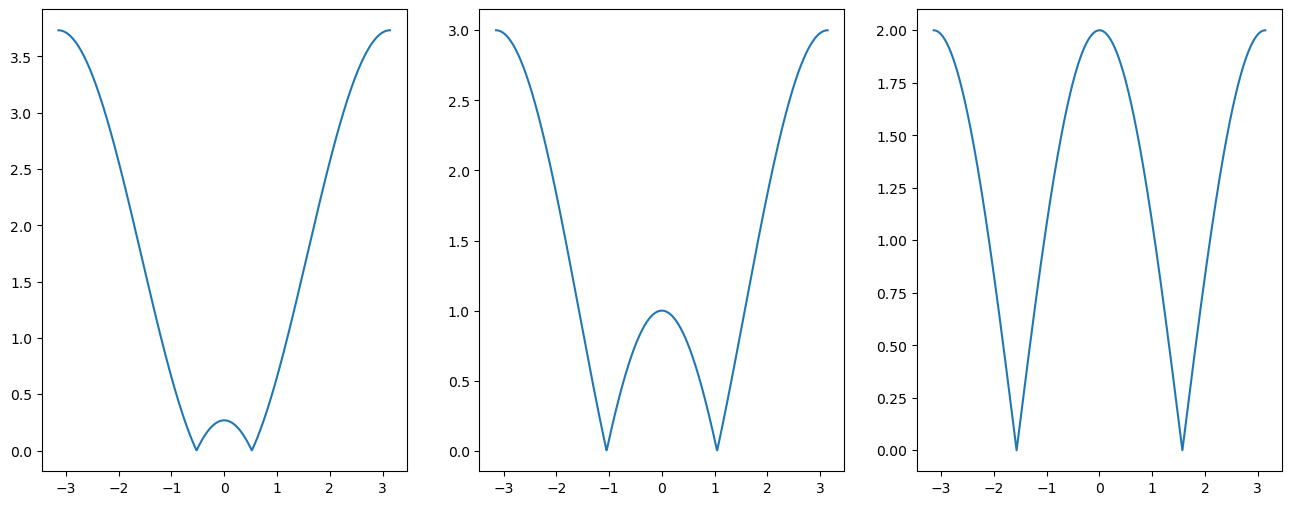

In [15]:
import math

def abs_Hf(w,theta):
    Hf = np.abs((1 - 2*np.cos(theta)*np.exp(-1j*w) + np.exp(-2j*w)))
    return Hf

w = np.linspace(-np.pi, np.pi, 1001)

Hf1 = abs_Hf(w, np.pi/6)
plt.subplot(1,3,1)
plt.plot(w, Hf1)

Hf2 = abs_Hf(w, np.pi/3)
plt.subplot(1,3,2)
plt.plot(w, Hf2)

Hf3 = abs_Hf(w, np.pi/2)
plt.subplot(1,3,3)
plt.plot(w, Hf3)

**5. Explain how the value of $\theta$ affects the magnitude of the filter's frequency response.**

With the increase of theta, the zero pair that got filtered becomes wider

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

In the next experiment, we will use the filter $H_f(z)$ to remove an undesirable sinusoidal interference from a speech signal. To run the experiment, load ```nspeech1.npy``` into Python using the command ```nspeech1 = np.load("nspeech1.npy")```.

**1. Play ```nspeech1``` using the command ```ipd.Audio(nspeech1, rate=8000)```.**

In [3]:
nspeech1 = np.load("nspeech1.npy")

ipd.Audio(nspeech1, rate=8000)

**2. Plot $101$ samples of the signal for the time indices ```[99:200]```.**

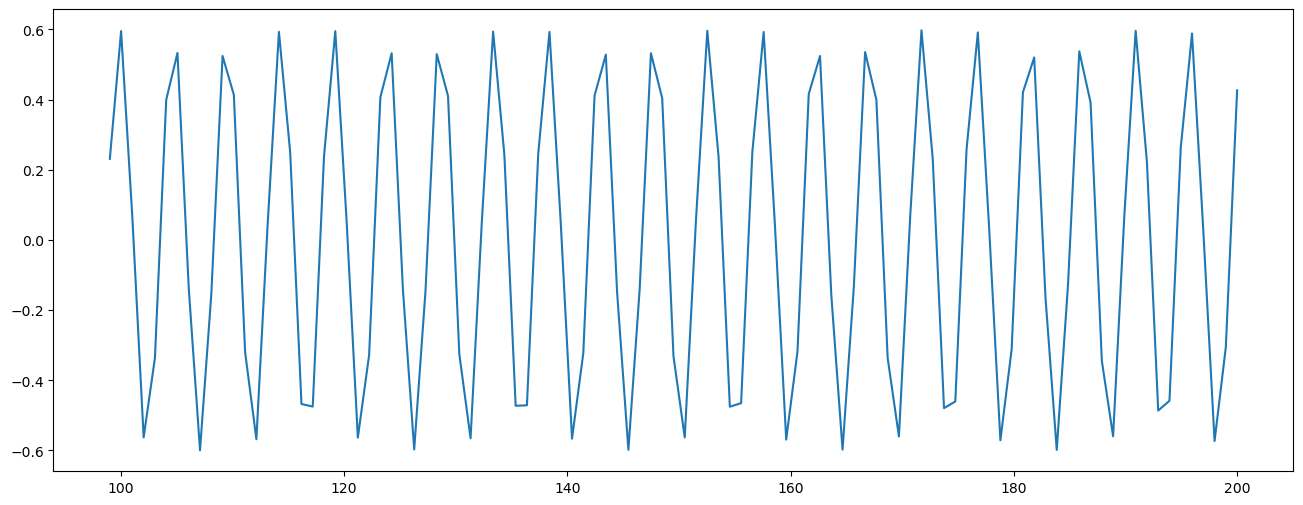

In [4]:
n = np.linspace(99, 200, 101)

plt.plot(n, nspeech1[99:200])

---

We will next use the ```DTFT``` function provided in the file ```helper.py``` to compute samples of the DTFT of the audio signal. Run the following code to import the function. Note that the command ```X, w = DTFT(x, 0)``` will generate a DTFT that is the same duration as the input; if this is not sufficient, it may be increased by specifying ```M```.

In [5]:
from helper import DTFT

**3. Compute the the DTFT of $1001$ samples of the audio signal for the time indices ```[99:1100]```. Then plot the magnitude of the DTFT samples versus frequency for $|\omega|<\pi$.**

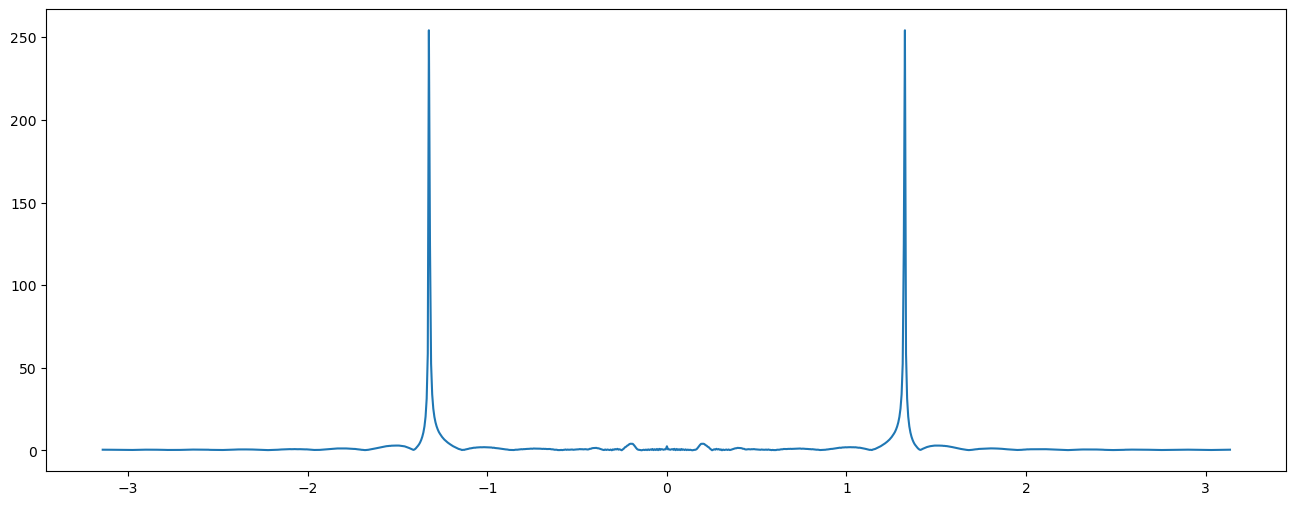

In [6]:
X, w = DTFT(nspeech1[99:1100], 0)
abs_X = np.abs(X)

plt.plot(w, abs_X)

---

Notice that there are two large peaks corresponding to the sinusoidal interference signal in the plot you drew above.

**4. Use the command [```np.argmax()```](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to determine the exact frequency of the peaks. This will
be the value of $\theta$ that we will use for filtering with $H_f(z)$. Print out the result.**

**Hint:** use the command ```idx_max = np.argmax(np.abs(X))``` to find the index of the maximum element in ```X```. Then $\theta$ can be derived using this index.

In [7]:
idx_max = np.argmax(np.abs(X))
theta = w[idx_max]
theta

-1.325359400733194

**5. Complete the function ```FIRfilter``` that implements the filter $H_f(z)$ with the measured value of $\theta$ and outputs the filtered signal (Hint: Use ```np.convolve()```).**

In [8]:
def FIRfilter(x, theta): 
    n = np.linspace(0, len(x), len(x)+1)
    h = (w == 0).astype(float) - 2*np.cos(theta)*(w==1).astype(float) + (w==2).astype(float)
    y = np.convolve(x, h)
    return y

**6. Apply the new function ```FIRfilter``` to the ```nspeech1``` vector to attenuate the sinusoidal interference. Listen to the filtered signal to hear the effects of the filter.**

In [9]:
nspeech1_FIR = FIRfilter(nspeech1, theta)

ipd.Audio(nspeech1_FIR, rate=8000)

**7. Comment on how the filtering changed the quality of the audio signal.**

The quality is fairly good after the filter

**8. Plot $101$ samples of the filtered signal for the time indices ```[99:200]```.**

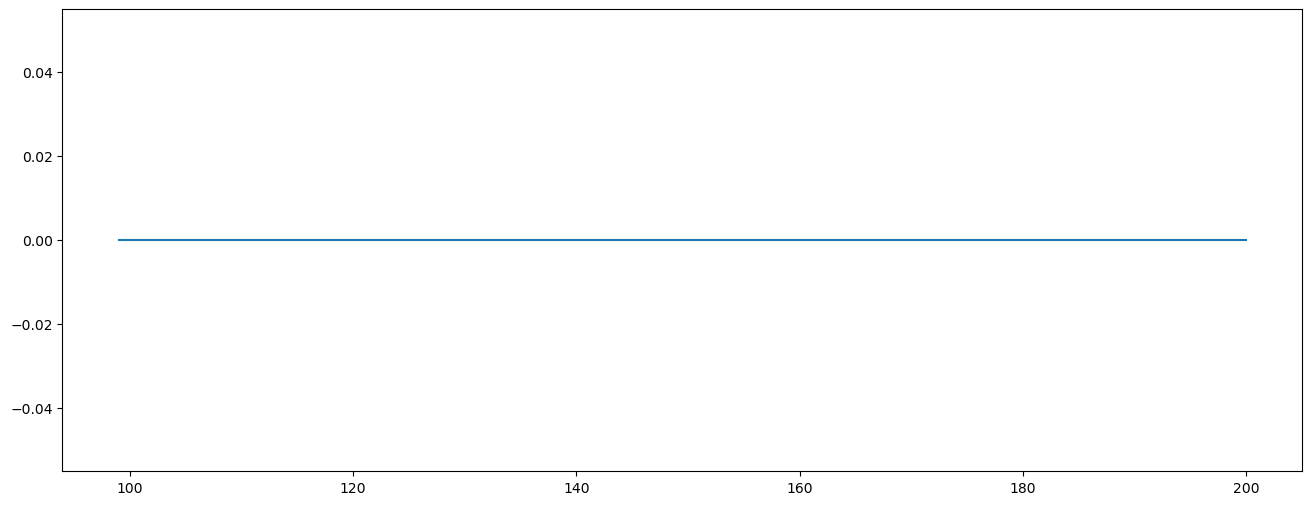

In [10]:
n = np.linspace(99, 200, 101)

plt.plot(n, nspeech1_FIR[99:200])

**9. Plot the magnitude of the DTFT of 1001 samples of the filtered signal for the time indices ```[99:1100]```.**

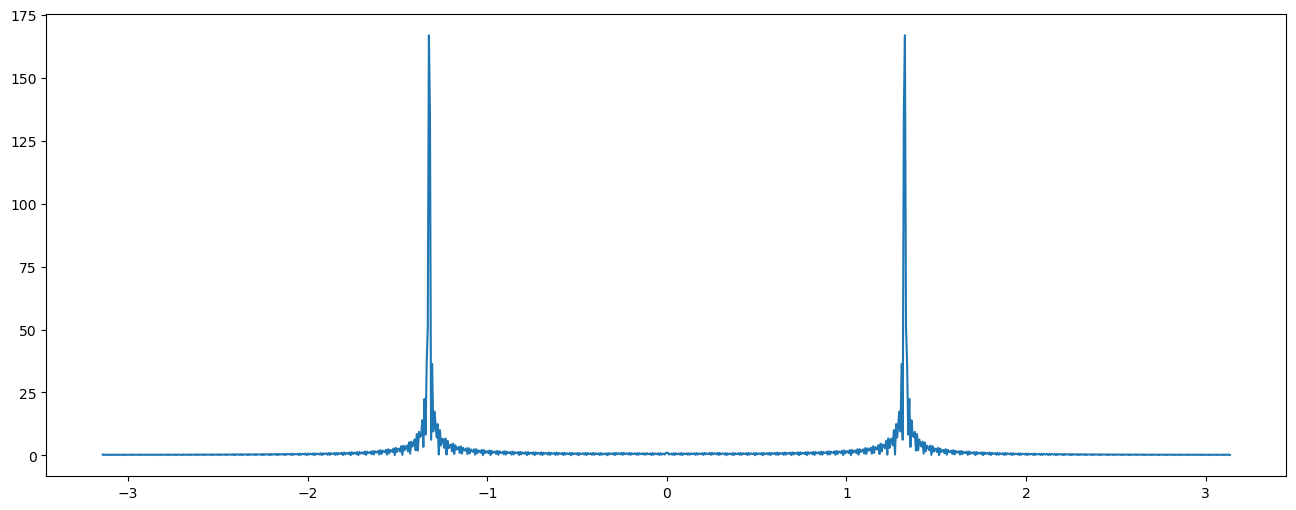

In [47]:
X1, w1 = DTFT(nspeech1_FIR[99:1100], 0)
abs_X1 = np.abs(X1)

plt.plot(w1, abs_X1)

**10. Is the filter we used a lowpass, highpass, bandpass, or a bandstop filter? Comment on how the frequency content of the signal changed after filtering.**

This filter is a bandstop filter. The sinosoidal part of the signal is removed, leaving only DC component.

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Submit the difference equation for the filter $H_i(z)$.**

<img src="Image_20230212094427.jpg">

**2. Submit the system diagram of the impulse response for the filter $H_i(z)$.**

<img src="IIR.drawio.png">

**3. Submit the analytical expression of the impulse response for the filter $H_i(z)$.**

**Hint:** the frequency response of the system can be obtained by restricting the $Z$-transform to the unit circle. So the DTFT of $h_i[n]$ is $H_i(e^{j\omega})$. Therefore, to get $h_i[n]$, you can take the inverse Fourier transform of $H_i(e^{j\omega})$.

<img src="Image_20230212094838.jpg">

**4. Write Python code to calculate and plot the magnitude of the filter’s frequency response $|H_i(e^{j\omega})|$ on $|\omega| < \pi$ for $\theta = \pi/3$ and the following three values of $r$:**
* $r=0.99$
* $r=0.9$
* $r=0.7$

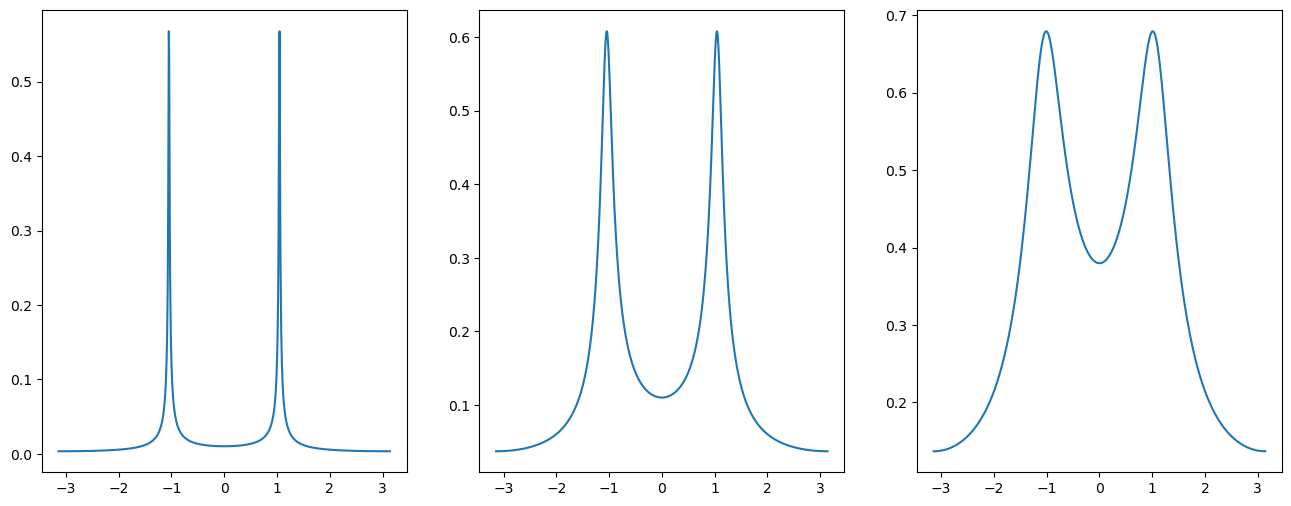

In [11]:
def abs_Hi(w,theta,r):
    Hi = np.abs((1 - r)/(1 - 2*r*np.cos(theta)*np.exp(-1j*w) + r*r*np.exp(-2j*w)))
    return Hi

w = np.linspace(-np.pi, np.pi, 1001)
theta = np.pi/3

Hi1 = abs_Hi(w, theta, 0.99)
plt.subplot(1,3,1)
plt.plot(w, Hi1)

Hi2 = abs_Hi(w, theta, 0.9)
plt.subplot(1,3,2)
plt.plot(w, Hi2)

Hi3 = abs_Hi(w, theta, 0.7)
plt.subplot(1,3,3)
plt.plot(w, Hi3)

**5. Explain how the value of $r$ affects this magnitude.**

As r closer to 1, the bandpass range becomes sharper

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

In the following experiment, we will use the filter $H_i(z)$ to separate a modulated sinusoid from background noise.

**1. Load the file ```pcm.npy``` and play it.**

In [13]:
pcm = np.load("pcm.npy")

ipd.Audio(pcm, rate=8000)


**2. Plot $101$ samples of the signal for the time indices ```[99:200]```.**

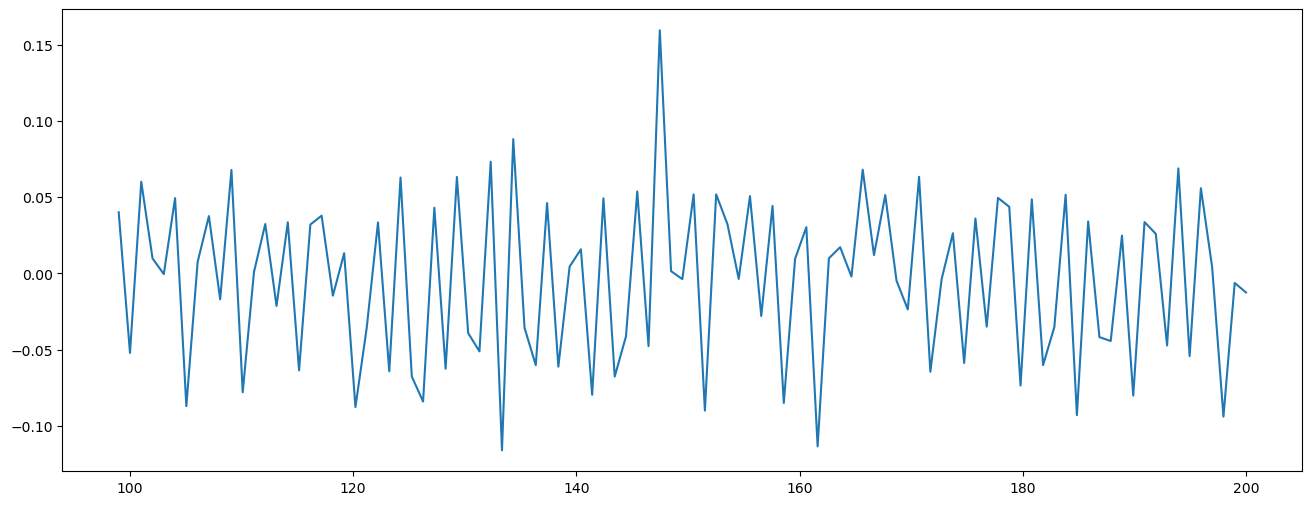

In [14]:
n = np.linspace(99, 200, 101)

plt.plot(n, pcm[99:200])


**3. Compute the the DTFT of $1001$ samples of the audio signal for the time indices ```[99:1100]```. Then plot the magnitude of the DTFT samples versus frequency for $|\omega|<\pi$.**

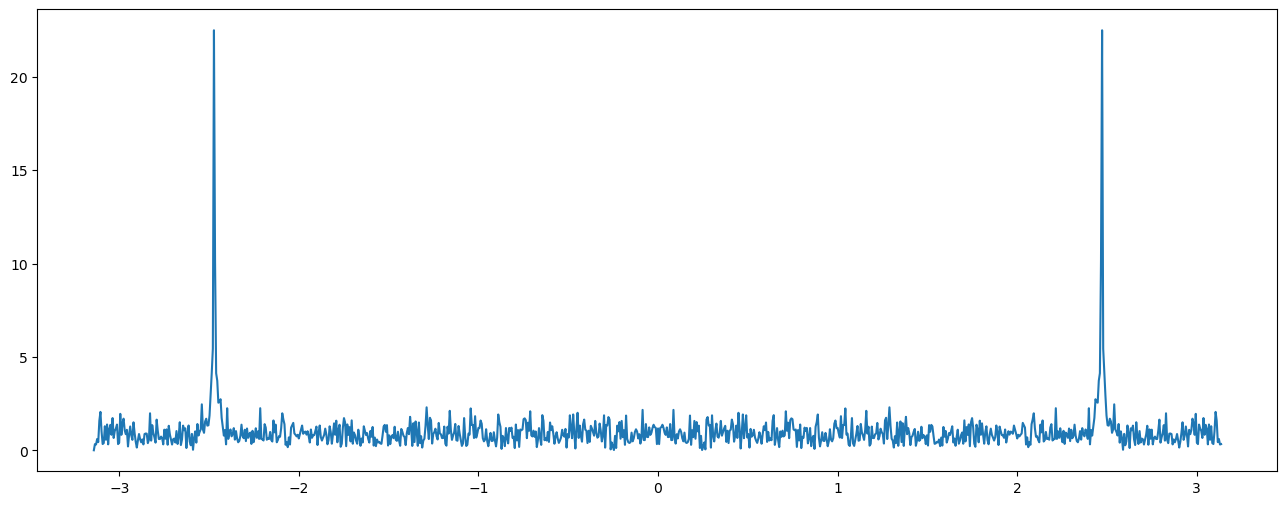

In [26]:
X, w = DTFT(pcm[99:1100], 0)
abs_X = np.abs(X)

plt.plot(w, abs_X)


---

The two peaks in the spectrum correspond to the center frequency of the modulated signal. The low amplitude wideband content is the background noise. In this exercise, you will use the IIR filter described above to amplify the desired signal, relative to the background noise.

**4. The pcm signal is modulated at $3146\text{ Hz}$ and sampled at $8\text{ kHz}$. Use these values to calculate the value of $\theta$ for the filter $H_i(z)$. Remember from the sampling theorem that a radial frequency of $2\pi$ corresponds to the sampling frequency. Print out the value of $\theta$.**

In [16]:
idx_max = np.argmax(np.abs(X))
theta = w[idx_max]
theta

2.4727770300716534

**5. Plot the magnitude of the DTFT for $\omega$ in the range $[\theta−0.02, \theta+0.02]$.**

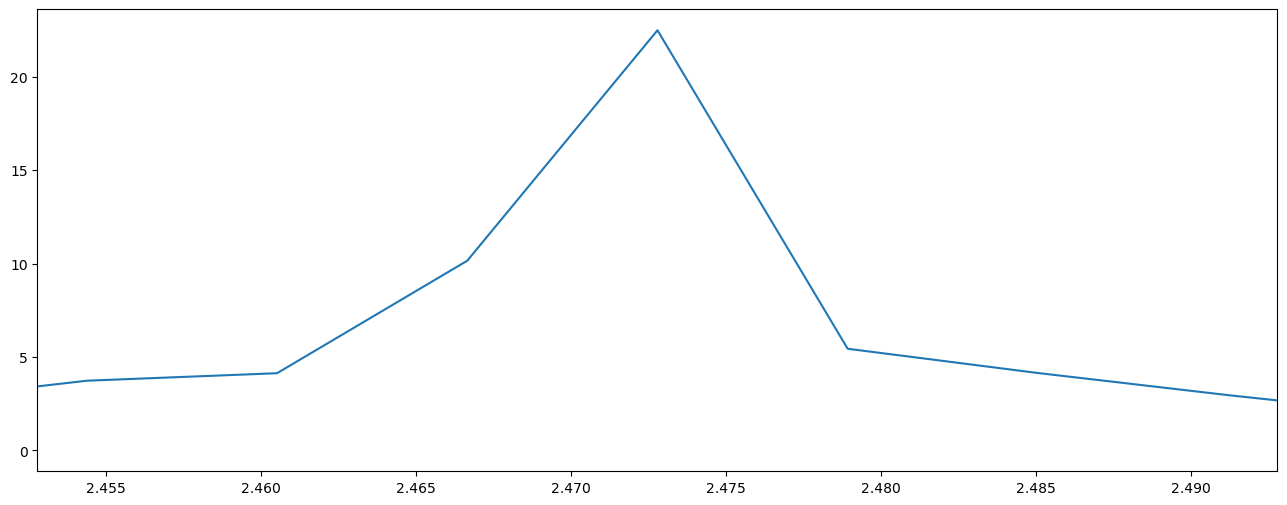

In [44]:
plt.xlim(theta-0.02,theta+0.02)
plt.plot(w, abs_X)

**6. Complete the function ```IIRfilter``` that implements the filter $H_i(z)$. In this case, you need to use a for loop to implement the recursive difference equation. Use your calculated value of $\theta$ and $r = 0.995$. You can assume that $y[n]$ is equal to $0$ for negative values of $n$.**

In [51]:
def IIRfilter(x, theta):
    r = 0.995

    y = [0]*len(x)
    y[0] = (1-r)*x[0]
    y[1] = (1-r)*x[1] + 2*np.cos(theta)*r*y[0]
    
    for i in range(2, len(x), 1):
        y[i] = (1-r)*x[i] + 2*np.cos(theta)*r*y[i-1] - r*r*y[i-2]
    
    return y


**7. Apply the function ```IIRfilter``` to the signal ```pcm``` to separate the desired signal from the background noise, and listen to the filtered signal to hear the effects.**

In [52]:
pcm_IIR = IIRfilter(pcm, theta)

ipd.Audio(pcm_IIR, rate=8000)


**8. Comment on how the signal sounds before and after filtering.**

The background noise are reduced

**9. Plot the filtered signal for indices ```[99:200]```.**

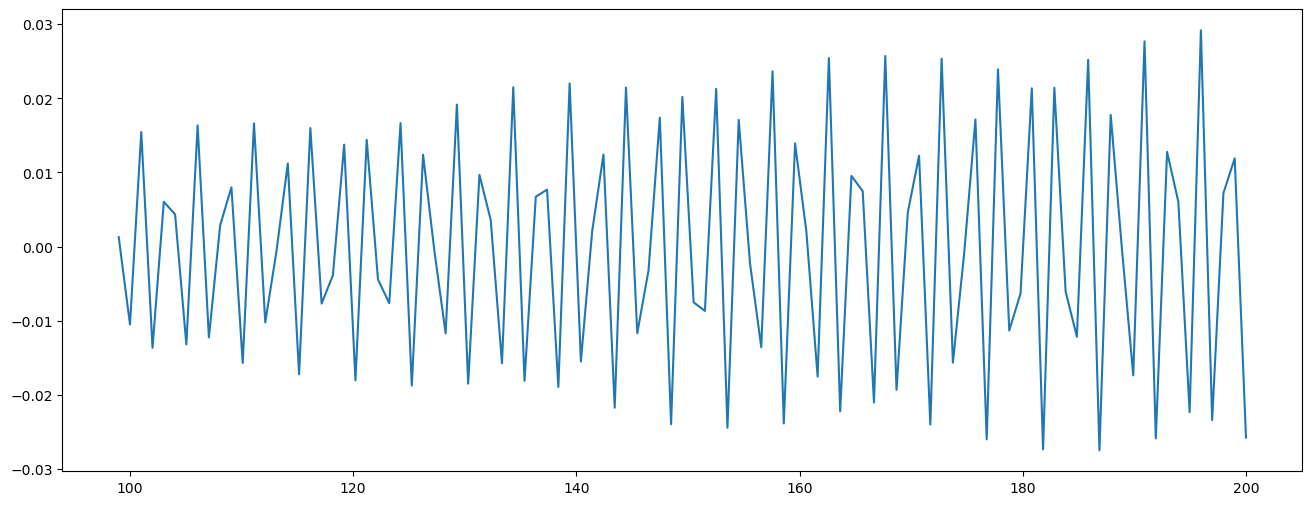

In [53]:
n = np.linspace(99, 200, 101)

plt.plot(n, pcm_IIR[99:200])


**10. Compute the DTFT of $1001$ samples of the filtered signal using the time indices ```[99:1100]``` and plot the magnitude of this DTFT.**

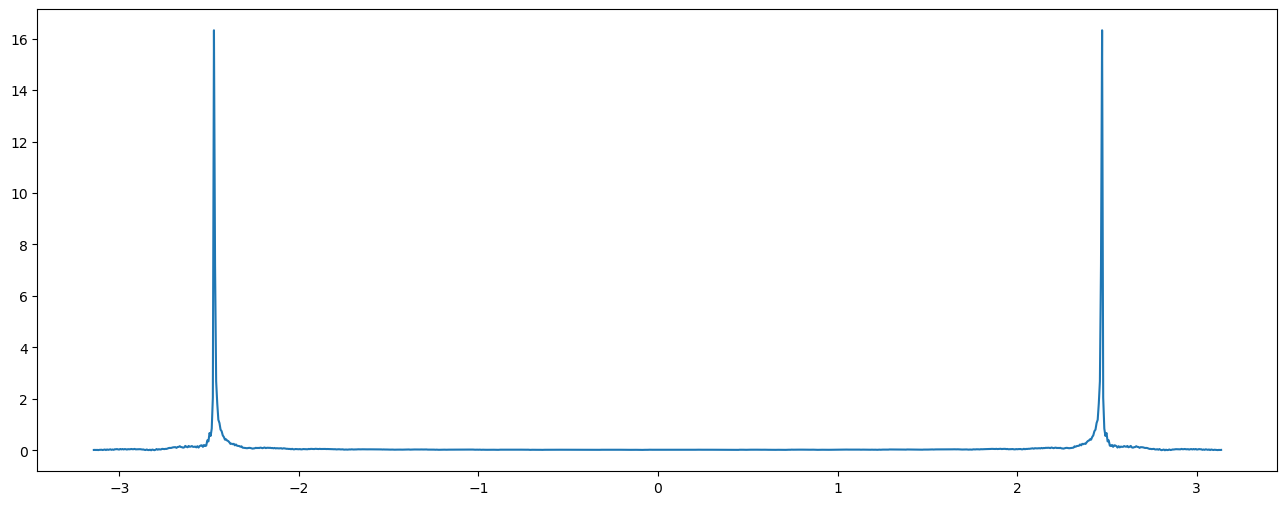

In [54]:
X1, w1 = DTFT(pcm_IIR[99:1100], 0)
abs_X1 = np.abs(X1)

plt.plot(w1, abs_X1)


**11. In order to see the DTFT around $\omega = \theta$ more clearly, plot also the portion of this DTFT for the values of $\omega$ in the range $[\theta − 0.02, \theta + 0.02]$. Use your calculated value of $\theta$.**

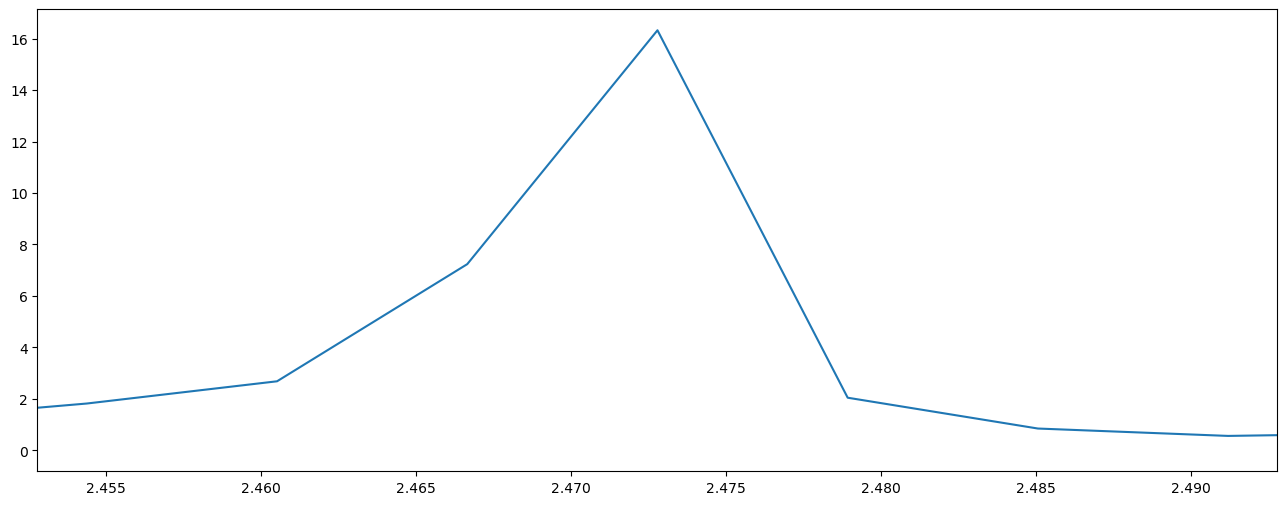

In [55]:
plt.xlim(theta-0.02,theta+0.02)
plt.plot(w1, abs_X1)


**12. Comment on how the signal looks before and after filtering.**

The noise are filtered out. The overall magnitude of the DTFT are reduced.

**13. How would you expect changes in $r$ to change the filtered output? Would a value of $r = 0.9999999$ be effective for this application? Why might such a value for $r$ be ill-advised? (Consider the spectrum of the desired signal around $\omega = \theta$.)**

Increase in r closer to 1 will sharpen the bandpass range. In the previous graph for w there are some desired signal frequency within +- 0.02 region. If r is too high we might filtered that as well.

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. To examine the effect of filter size on the frequency characteristics of the filter, complete the function ```LPFtrunc(N)``` that computes the truncated and shifted impulse response of size ```N``` for a low pass filter with a cutoff frequency of $\omega_c = 2.0$.**

In [56]:
def LPFtrunc(N):
    wc = 2
    n = np.linspace(0, N-1, N)
    h = wc/np.pi*np.sinc(wc/np.pi*(n-(N-1)/2))
    return h

**2. For each of the following filter sizes, compute the filter’s DTFT.**
* $N=21$
* $N=101$

**Hints:** To get an accurate representation of the DTFT make sure that you compute at
least $512$ sample points using the command ```X, w = DTFT(filter_response, 512)```.

In [57]:
X1, w1 = DTFT(LPFtrunc(21), 512)
X2, w2 = DTFT(LPFtrunc(101), 512)

**3. Plot the magnitude of both filters' DTFTs. On each of the plots, mark the passband, the transition band and the stopband.**

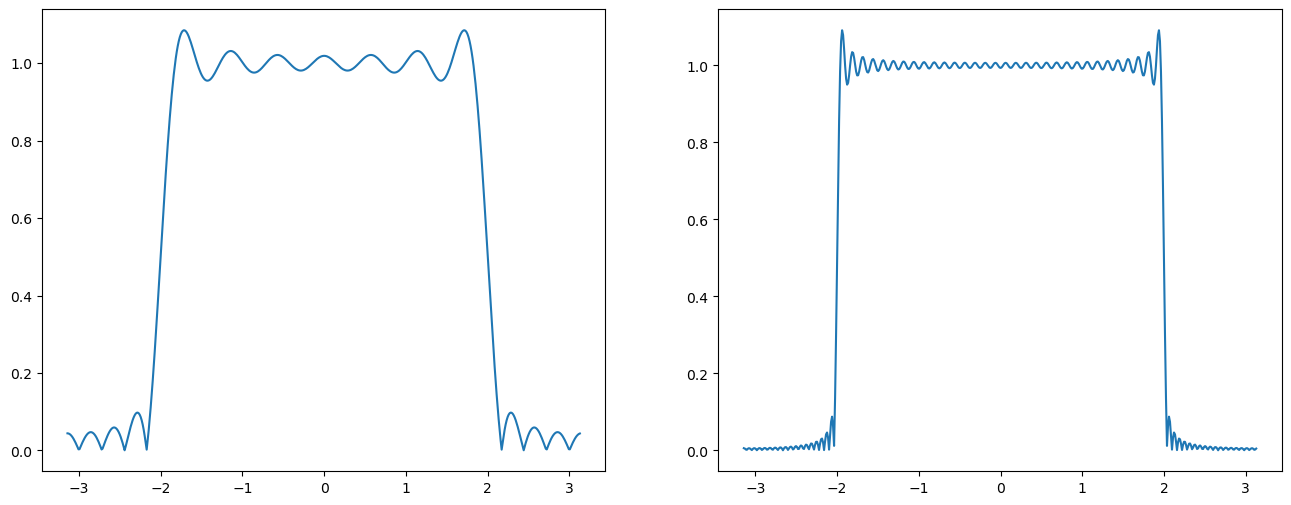

In [59]:
plt.subplot(1,2,1)
plt.plot(w1,abs(X1))

plt.subplot(1,2,2)
plt.plot(w2,abs(X2))


     stopband |T|           passband          |T| stopband                 stopband |T|          passband        |T|stopband

**4. Plot the magnitude of both filters' DTFTs in decibels.**

**Hint:** the magnitude of the response in decibels is given by $|H_{\text{dB}}(e^{j\omega})| = 20 \log10 |H(e^{j\omega})|$. Note that the ```np.log``` command in Python computes the natural logarithm. Therefore, use the ```np.log10``` command to compute
decibels. 

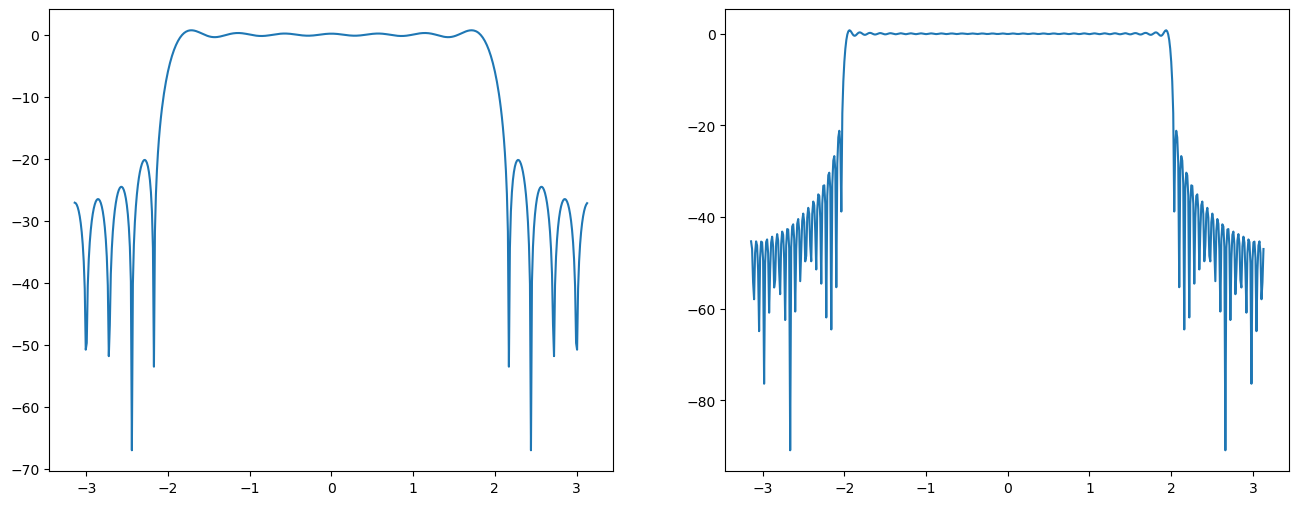

In [68]:
plt.subplot(1,2,1)
plt.plot(w1, 20*np.log10(np.abs(X1)))

plt.subplot(1,2,2)
plt.plot(w2, 20*np.log10(np.abs(X2)))


**5. Explain how the filter size effects the stopband ripple. Why does it have this effect?**

As filter size increase, the ripple becomes more dense

**6. Load the file ```nspeech2.npy``` and play it. Also, note the quality of the speech and background noise.**

In [69]:
nspeech2 = np.load("nspeech2.npy")

ipd.Audio(nspeech2, rate=8000)


**7. Apply the two filters with the above sizes to this signal. Since these are FIR filters, you can simply convolve them with the audio signal. Listen carefully to the unfiltered and filtered signals, and note the result. Can you hear a difference between the two filtered signals? In order to hear the filtered signals better, you may want to multiply each of them by 2 or 3 before using sound.**

In [70]:
y1 = np.convolve(LPFtrunc(21),nspeech2)
ipd.Audio(y1, rate=8000)

In [71]:
y1 = np.convolve(LPFtrunc(101),nspeech2)
ipd.Audio(y1, rate=8000)

Yes, I can hear the difference

**8. Comment on the quality of the filtered signals. Does the filter size have a noticeable
effect on the audio quality?**

Yes. With bigger trunc box, the background noise reduced more significantly.